# Plotting

A notebook to plot the data output by the c++ code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import animation, cm
from IPython.display import HTML
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
import tables as tb

In [19]:
# read input file 
input_file = open('input_file.txt', 'r')
inputs = input_file.readlines()

for line in inputs:
    name, *dat = line.split();
    
    if not (name == 'periodic' or name == 'outfile'):
        if len(dat) == 1:
            if name in ('nx', 'ny', 'nt', 'nlayers', 'dprint'):
                exec(name + ' = int(dat[0])')
            else:
                    
                exec(name + ' = float(dat[0])')
        else:
            exec(name + ' = [float(d) for d in dat]')
    elif name == 'outfile':
        outfile = dat[0]

            
dx = (xmax - xmin) / (nx-2)
dy = (ymax - ymin) / (ny-2)
dt = 0.1 * min(dx, dy)
input_file.close()

In [20]:
# read data
outfile = '../../Documents/Work/swerve/out.h5'
if (outfile[-2:] == 'h5'): #hdf5
    f = tb.open_file(outfile, 'r')
    table = f.root.SwerveOutput
    D_2d = np.swapaxes(table[:,:,:,:,0], 1, 3)
else: # assume some kind of csv
    data = np.loadtxt(outfile, delimiter=',')
    ts = data[:,0]
    xs = data[:,1]
    ys = data[:,2]
    ls = data[:,3]
    Ds = data[:,4]
    Sxs = data[:,5]
    Syx = data[:,6]
    #t = range(int((nt+1)/dprint))*dprint

    D_2d = np.zeros((int((nt+1)/dprint), nlayers, nx, ny))
    #Sx_2d = np.zeros((nt, nlayers, nx, ny))
    #Sy_2d = np.zeros((nt, nlayers, nx, ny))

    for i in range(int((nt+1)/dprint)*dprint*nlayers*nx*ny):
        #print(int(xs[i]*nx/xmax))
        D_2d[int(ts[i]), int(ls[i]), int(xs[i]), int(ys[i])] = Ds[i]

In [14]:
x = np.linspace(0, xmax, num=nx, endpoint=False)
y = np.linspace(0, ymax, num=ny, endpoint=False)

In [15]:
X, Y = np.meshgrid(x,y)

In [16]:
print(np.shape(X))
print(np.shape(Y))
np.shape(D_2d[0,1,:,:])

(500, 500)
(500, 500)


(500, 500)

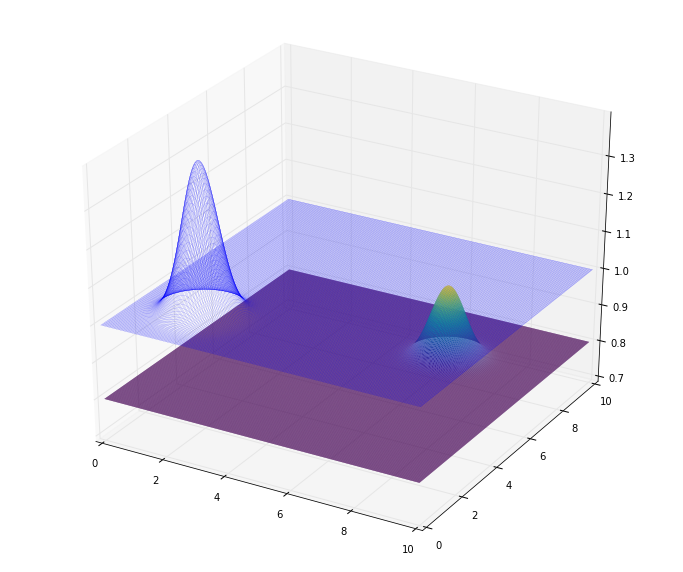

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0.7,1.4)

ax.plot_surface(X,Y,D_2d[0,1,:,:].T, rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)

ax.plot_wireframe(X,Y,D_2d[0,0,:,:].T, rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

#plt.plot(x,h[0,1:-1,0],x,h[1,1:-1,0], lw=2)
plt.show()

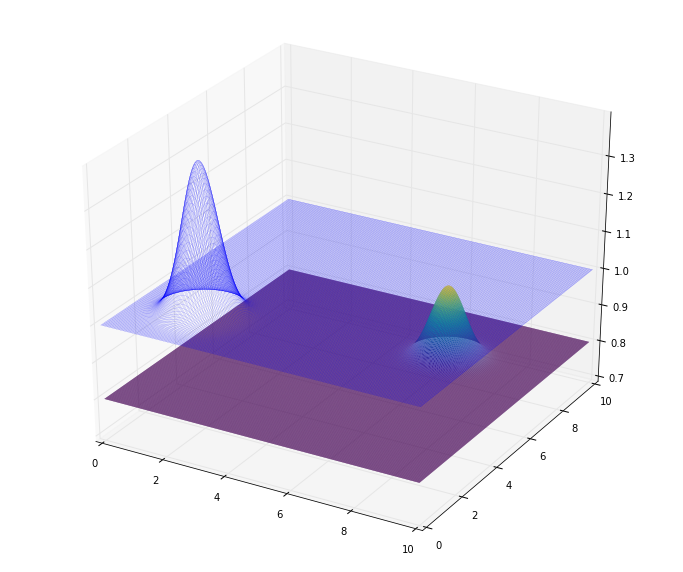

In [18]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

surface_1 = ax.plot_surface(X,Y,D_2d[0,1,:,:].T, rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)
surface_2 = ax.plot_wireframe(X,Y,D_2d[0,0,:,:].T, rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

def animate(i):
    ax.clear()
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_zlim(0.7,1.4)
    ax.plot_surface(X,Y,D_2d[i,1,:,:].T, rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)
    ax.plot_wireframe(X,Y,D_2d[i,0,:,:].T, rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

anim = animation.FuncAnimation(fig, animate, frames=60, interval=200)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
to_save = False

if to_save:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
    anim.save('gr_cuda.mp4', writer=writer)

In [ ]:
if (outfile[-2:] == 'h5'): #hdf5
    f.close()